# Objective : Exploratory Data Analysis (minute - wide)

### Importing the required Libraries ->

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading and Previewing the Dataset ->

In [2]:
data = pd.read_csv("G:\My Drive\Prepinsta - Data Analytics\Week 8 - Task 8\Master Datasets\minutely_merged_data_wide.csv",index_col=0)
data.head()

,id,activityday,activitytime,minute,intensities,calories,steps
0,1503960366,2016-04-13,12:00:00,0,1,1.8876,4
1,1503960366,2016-04-13,1:00:00,0,0,0.7865,0
2,1503960366,2016-04-13,2:00:00,0,0,0.7865,0
3,1503960366,2016-04-13,3:00:00,0,0,0.7865,0
4,1503960366,2016-04-13,4:00:00,0,0,0.7865,0


- The dataset contains information related to physical activities, including calories,intensity,steps on minute basis.

### Checking for Missing Values ->

In [3]:
data.isnull().sum()

id              0
activityday     0
activitytime    0
minute          0
intensities     0
calories        0
steps           0
dtype: int64

- Missing Values: There are no missing values in the dataset after the initial cleaning.

### Check for Duplicate values and remove if any ->

In [4]:
# chek if is there any duplicate values in dataset
duplicates = duplicates = data.duplicated().sum()
duplicates

0

- Duplicate Rows: There are no duplicate rows in the dataset.


### Descriptive Statistics ->

In [5]:
# Provide summary statistics
summary_statistics = data.describe()
summary_statistics

,id,minute,intensities,calories,steps
count,1.016186e+06,1.016186e+06,1.016186e+06,1.016186e+06,1.016186e+06
mean,4.873623e+09,2.949463e+01,2.565229e-01,1.758877e+00,6.826054e+00
std,2.407535e+09,1.731997e+01,5.752581e-01,1.563145e+00,2.023552e+01
min,1.503960e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.320127e+09,1.400000e+01,0.000000e+00,9.860400e-01,0.000000e+00
50%,4.558610e+09,3.000000e+01,0.000000e+00,1.260600e+00,0.000000e+00
75%,6.962181e+09,4.400000e+01,0.000000e+00,1.589380e+00,0.000000e+00
max,8.877689e+09,5.900000e+01,3.000000e+00,1.974995e+01,2.200000e+02


- High variability in activity metrics might indicate inconsistent physical activity habits, suggesting a need for more structured exercise routines or goals.

- Using percentiles, individuals or fitness programs can set realistic activity goals. For example, aiming to be above the 50th percentile for daily calories burned could be an initial goal for someone starting a new exercise regimen.

- Identifying periods of minimal activity (through minimum values and lower quartiles) can highlight opportunities for introducing more physical activity into daily routines.


In [6]:
# Check the unique values in 'minute' to understand its distribution
unique_minutes = data['minute'].unique()

unique_minutes

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59], dtype=int64)

- Upon examining the minute column, it appears to represent each minute of an hour, ranging from 0 to 59, which clarifies its role in the dataset.

### Activities wrt to hour/min ->

In [7]:
# For the purpose of demonstration, let's select the first date and a specific hour from the dataset
# First, let's check the unique activity days and times to choose a sample
unique_days = data['activityday'].unique()
unique_times = data['activitytime'].unique()

# Displaying the first few unique days and times to choose a sample for demonstration
unique_days[:5], unique_times[:10]

(array(['2016-04-13', '2016-04-14', '2016-04-15', '2016-04-16',
        '2016-04-17'], dtype=object),
 array(['12:00:00', '1:00:00', '2:00:00', '3:00:00', '4:00:00', '5:00:00',
        '6:00:00', '7:00:00', '8:00:00', '9:00:00'], dtype=object))

In [8]:
# Filter data for the selected date and time
selected_date = '2016-04-13'
selected_time = '12:00:00'  # Using 24-hour format for clarity

# Filtering the dataset for the selected date and time
hourly_data = data[(data['activityday'] == selected_date) & (data['activitytime'] == selected_time)]

# Since we're interested in a per-minute visualization, the data should already be in the correct granularity
# Display the first few rows to confirm
hourly_data.head()

,id,activityday,activitytime,minute,intensities,calories,steps
0,1503960366,2016-04-13,12:00:00,0,1,1.88760,4
12,1503960366,2016-04-13,12:00:00,0,1,2.04490,9
719,1624580081,2016-04-13,12:00:00,0,0,0.83100,0
1448,1644430081,2016-04-13,12:00:00,0,0,1.40530,0
1460,1644430081,2016-04-13,12:00:00,0,0,1.68636,0


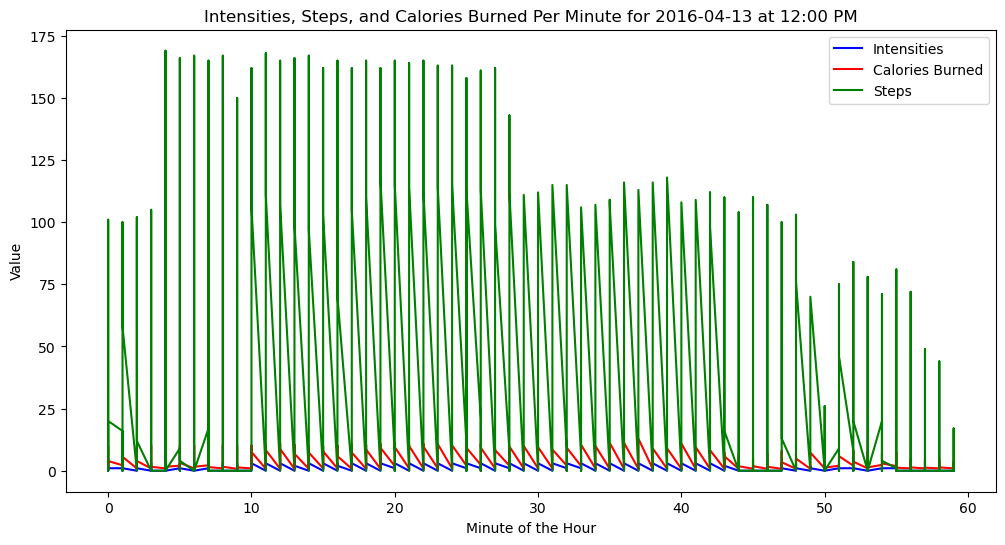

In [9]:

# hourly_data is filtered correctly and contains columns ['minute', 'intensities', 'calories', 'steps']
plt.figure(figsize=(12, 6))

# Plotting intensities
plt.plot(hourly_data['minute'], hourly_data['intensities'], label='Intensities', color='blue')

# Plotting calories on the same graph
plt.plot(hourly_data['minute'], hourly_data['calories'], label='Calories Burned', color='red')

# Plotting steps on the same graph
plt.plot(hourly_data['minute'], hourly_data['steps'], label='Steps', color='green')

plt.xlabel('Minute of the Hour')
plt.ylabel('Value')
plt.title('Intensities, Steps, and Calories Burned Per Minute for 2016-04-13 at 12:00 PM')
plt.legend()
plt.show()


-  Peaks in the graph indicate moments of high activity. If you see spikes in steps and intensities, it suggests periods of intense physical activity.

- By plotting steps, intensities, and calories burned together, we can observe how these metrics correlate with each other. For instance, higher intensities should generally correlate with higher calorie burn rates.

- The distribution of activity across the hour can indicate consistency. A steady line suggests consistent activity levels, whereas a graph with significant ups and downs indicates fluctuating activity levels. Consistent activity, even at a moderate pace, can be beneficial for endurance and cardiovascular health.

- Steps and Intensities drop to near-zero, indicate rest or inactivity periods. These pauses can be strategic for interval training or might indicate interruptions in activity.

- By understanding activity patterns and their results, individuals can set more informed goals regarding steps, intensities, and calorie burn for future activities or workouts.


### Activity Bursts Over a 24-Hour Cycle ->

C:\Users\bhavs\AppData\Local\Temp\ipykernel_4300\491686733.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['minute_of_day'] = (pd.to_datetime(data['activitytime']).dt.hour * 60) + pd.to_datetime(data['activitytime']).dt.minute
C:\Users\bhavs\AppData\Local\Temp\ipykernel_4300\491686733.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['minute_of_day'] = (pd.to_datetime(data['activitytime']).dt.hour * 60) + pd.to_datetime(data['activitytime']).dt.minute


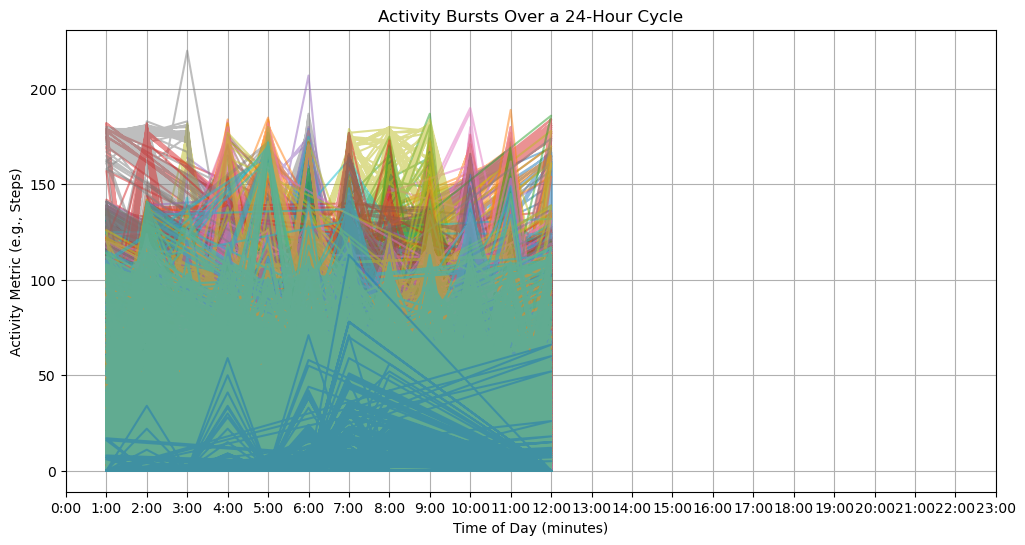

In [10]:
# Convert 'activitytime' to a minute-of-day format.
data['minute_of_day'] = (pd.to_datetime(data['activitytime']).dt.hour * 60) + pd.to_datetime(data['activitytime']).dt.minute

plt.figure(figsize=(12, 6))
for date in data['activityday'].unique():
    daily_data = data[data['activityday'] == date]
    plt.plot(daily_data['minute_of_day'], daily_data['steps'], alpha=0.5)  # Adjust alpha for transparency

plt.xlabel('Time of Day (minutes)')
plt.ylabel('Activity Metric (e.g., Steps)')
plt.title('Activity Bursts Over a 24-Hour Cycle')
plt.xticks(range(0, 1440, 60), labels=[f'{hour}:00' for hour in range(24)])  # Adjusting x-axis ticks for readability
plt.grid(True)
plt.show()


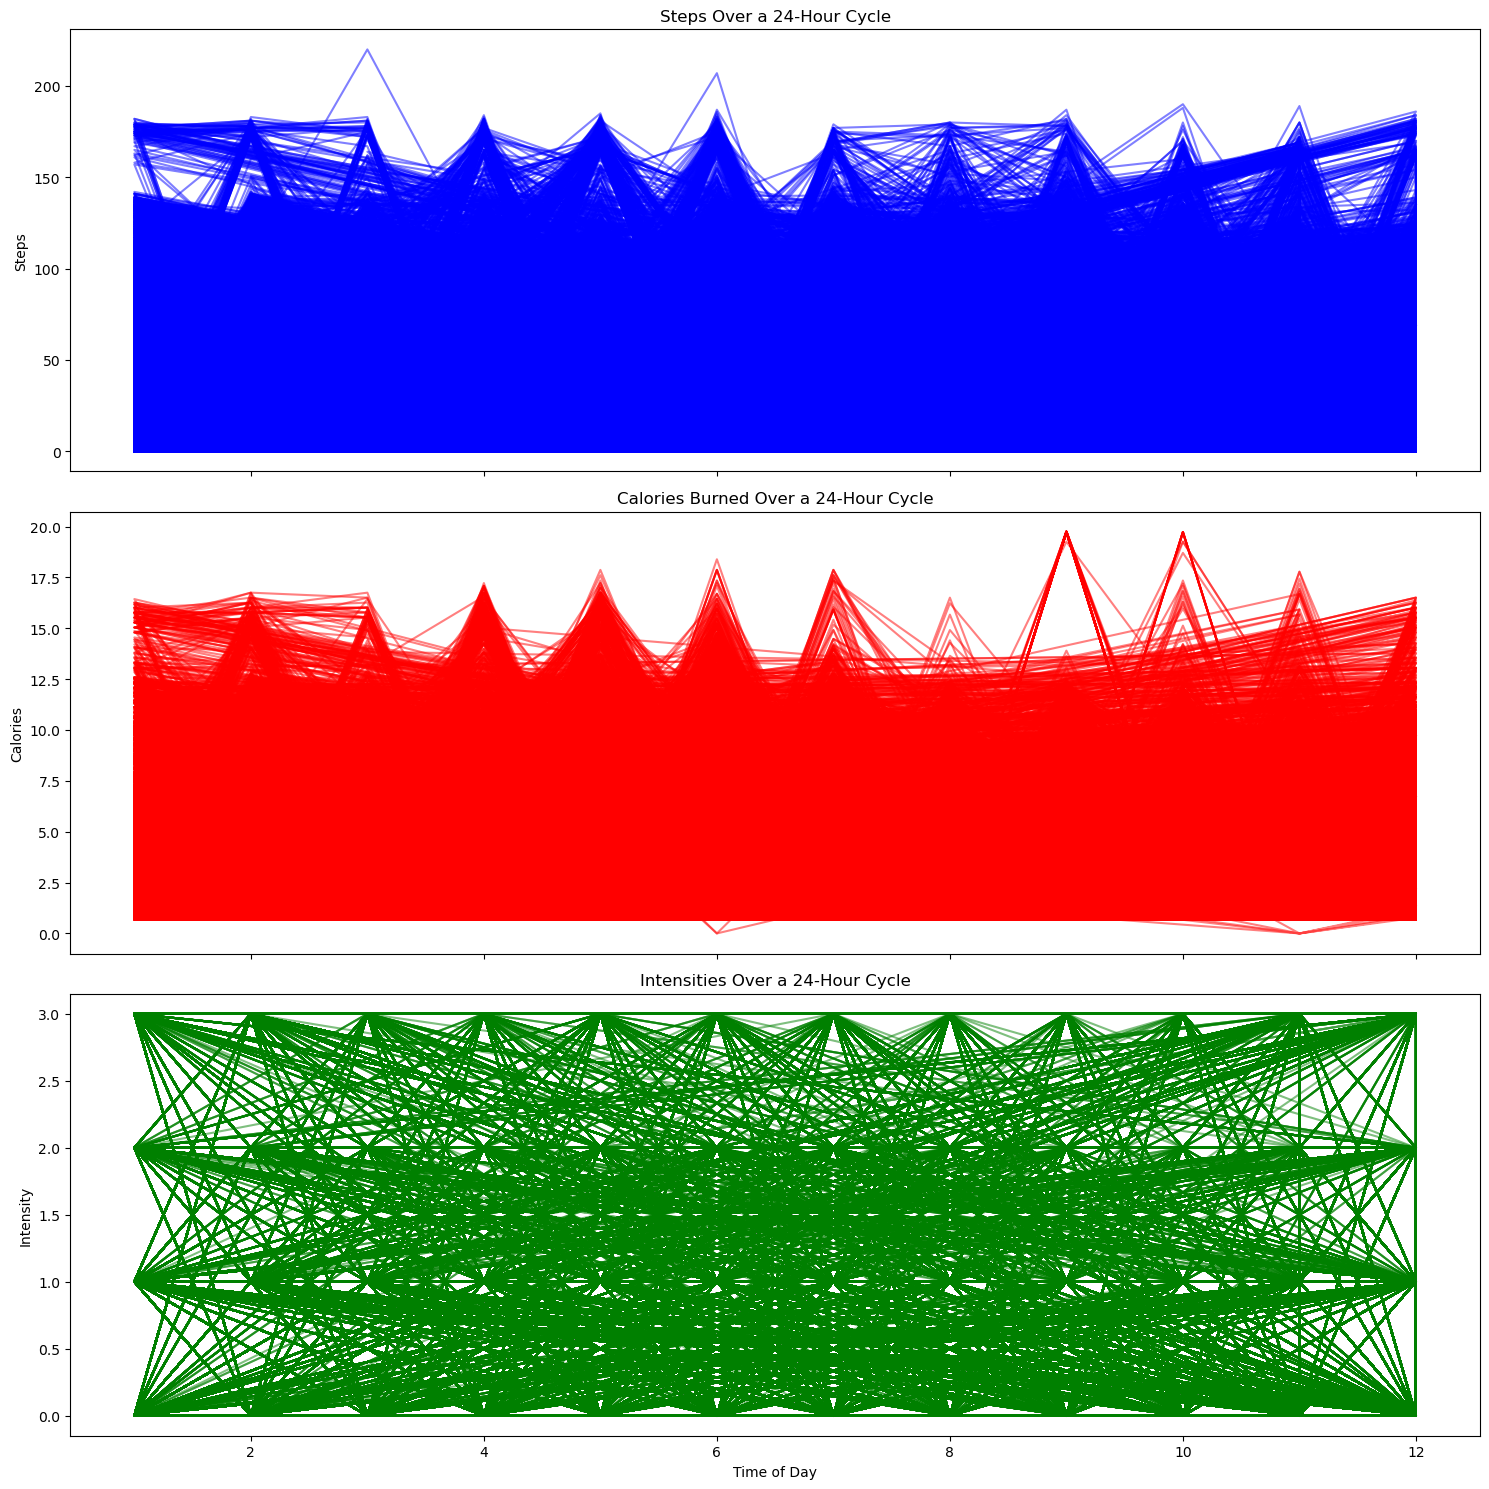

In [18]:
# Adjust the parameters to prevent the error
plt.rcParams['agg.path.chunksize'] = 10000  # Adjust this value as needed, depending on your data size
plt.rcParams['path.simplify_threshold'] = 1.0/9.0

# Convert timestamps to appropriate datetime format if necessary
data['timestamp'] = pd.to_datetime(data['activitytime']).dt.hour

# Plot each activity metric in a separate subplot
fig, axs = plt.subplots(3, 1, figsize=(15, 15), sharex=True)

# Plot steps
axs[0].plot(data['timestamp'], data['steps'], color='blue', alpha=0.5)
axs[0].set_title('Steps Over a 24-Hour Cycle')
axs[0].set_ylabel('Steps')

# Plot calories
axs[1].plot(data['timestamp'], data['calories'], color='red', alpha=0.5)
axs[1].set_title('Calories Burned Over a 24-Hour Cycle')
axs[1].set_ylabel('Calories')

# Plot intensities
axs[2].plot(data['timestamp'], data['intensities'], color='green', alpha=0.5)
axs[2].set_title('Intensities Over a 24-Hour Cycle')
axs[2].set_ylabel('Intensity')
axs[2].set_xlabel('Time of Day')

# Improve layout
plt.tight_layout()
plt.show()


**Steps**
- There are clear patterns of activity, with peaks that suggest periods of walking or running, likely corresponding to routine activities like commuting, walking, or exercising.

- The consistency of peaks suggests that these activities occur at similar times each day, indicating a regular schedule or routine.
The peaks appear to reach similar heights each day, which may indicate a consistent level of activity in each burst (e.g., similar distances walked each day).

**Calories Burned**
- The calories burned increase during certain times of the day, which may align with the times of increased physical activity as seen in the steps plot.

- The magnitude of calories burned is relatively consistent across days, with some variability that could be due to the intensity or duration of the activity.

**Intensities**
- Unlike steps and calories, the intensities do not show a clear pattern, which could be due to the nature of intensity measurement or more sporadic engagement in intensive activities.

- Some higher intensity spikes are visible, but without a clear routine or pattern, which might suggest irregular high-intensity activities like workouts or sports.

## Conclusion 

- To sum up, the knowledge obtained from applying EDA to the physical activity dataset highlights the complexity and diversity of fitness tracking information. 

- They demonstrate how these analytics can help guide better decisions about exercise and health, both individually and within programs. 

- Individuals and health professionals can customize techniques to optimize health advantages, promote consistency in physical activity, and eventually develop a more active and healthier society by comprehending the subtleties of physical activity patterns.